In [1]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
# Carico i Dati
PimaDB=pd.read_csv("https://raw.githubusercontent.com/ettore1461/My-Introduction-to-Statistical-Learning/master/Dataset/PimaDB/PimaDB.csv")

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
Y=PimaDB.iloc[:,-1]
X=PimaDB.iloc[:,:-1]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=123)

# Boosting

si utilizzera la libreria `xgboost` che estende il classico algoritmo di _Gradient Boosting_

`xgboost` è un metodo ensamble di tipo supervisionato, che lavora su vettori di tipo numerico, costruendo degli alberi di regressioni e poi aggregandone i risultati

# Metodi Ensemble

* ## Bagging
funziona insieme a un classificatore.

Il _bagging_ combina modelli **indipendenti** tra loro, per vedere quale modello fitta meglio i dati

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
PimaDB.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
bagging = BaggingClassifier(KNeighborsClassifier()
                            ,max_samples=0.5 
                            ,max_features=0.5 
                           )

In [21]:
scores = cross_val_score(bagging,x_train,y_train) # di default esegue il 3-fold CV
scores.mean()

0.74301675977653636

In [22]:
bagging.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [23]:
pred = bagging.predict(x_test)

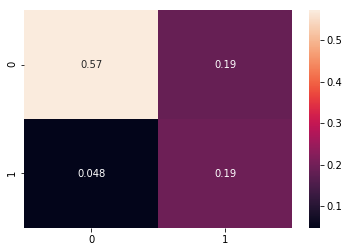

In [26]:
sns.heatmap(confusion_matrix(pred,y_test)/pred.size,annot=True)

In [27]:
print(classification_report(pred,y_test))

             precision    recall  f1-score   support

          0       0.92      0.75      0.83       175
          1       0.51      0.80      0.62        56

avg / total       0.82      0.77      0.78       231



* ### Bagging - Regressione

In [29]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import SGDRegressor

In [ ]:
bagging = BaggingRegressor(SGDRegressor()
                           ,n_jobs=1
                           ,n_estimators=1000
                           ,random_state=123
                           ,max_features=0.6
                          )

In [30]:
temp=PimaDB.iloc[:,:-1]
Y=PimaDB.iloc[:,0]
X=PimaDB.iloc[:,1:]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=123)

In [31]:
bagging.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [32]:
pred=bagging.predict(x_test)

In [34]:
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_test,pred))
print("MAE: ", metrics.mean_absolute_error(y_test,pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,pred)))

MSE: 12.696969697
MAE:  2.60173160173
RMSE:  3.56328074911


* ## Boosting

i modelli che vengono combinati sono dipendenti tra di loro.


### AdaBoosting

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
Y=PimaDB.iloc[:,-1]
X=PimaDB.iloc[:,:-1]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=123)

In [49]:
clf = AdaBoostClassifier(n_estimators=100 # numero di classificatori deboli
                        )

In [50]:
scores = cross_val_score(clf,
                        x_train,
                        y_train)

In [51]:
scores.mean()

0.75046554934823095

In [52]:
clf.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [53]:
pred=clf.predict(x_test)

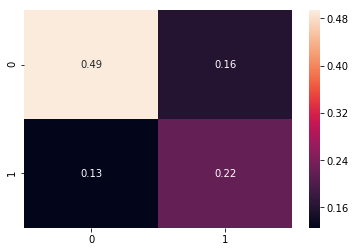

In [54]:
sns.heatmap(confusion_matrix(pred,y_test)/pred.size,annot=True)

In [55]:
print(classification_report(pred,y_test))

             precision    recall  f1-score   support

          0       0.80      0.75      0.78       151
          1       0.58      0.64      0.61        80

avg / total       0.72      0.71      0.72       231



### Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01)

In [74]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [75]:
pred=gbc.predict(x_test)

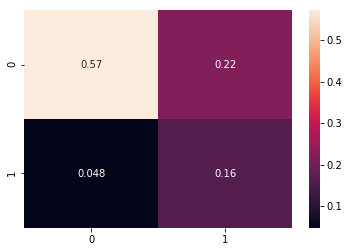

In [76]:
sns.heatmap(confusion_matrix(pred,y_test)/pred.size,annot=True)

In [77]:
print(classification_report(pred,y_test))

             precision    recall  f1-score   support

          0       0.92      0.72      0.81       183
          1       0.42      0.77      0.54        48

avg / total       0.82      0.73      0.75       231



# Random Forest


In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
rfc= RandomForestClassifier(criterion= "entropy", n_estimators=10, random_state=1234, n_jobs=2)

In [6]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [7]:
pred=rfc.predict(x_test)

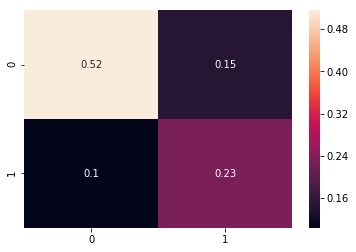

In [8]:
sns.heatmap(confusion_matrix(pred,y_test)/pred.size,annot=True)

In [9]:
print(classification_report(pred,y_test))

             precision    recall  f1-score   support

          0       0.83      0.78      0.80       153
          1       0.61      0.69      0.65        78

avg / total       0.76      0.75      0.75       231



# Confronto tra modelli

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

## modelli da confrontare
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [13]:
gb = GaussianNB()
lr=LogisticRegression(random_state=1234)
rfc= RandomForestClassifier(criterion= "entropy", n_estimators=10, random_state=1234, n_jobs=2)

In [23]:
eclf=VotingClassifier(estimators= [
    ("GB",gb),
    ("LogReg",lr),
    ("RandForest",rfc)
], voting="hard")

con la funzione `VotingClassifier` Combina conettualmente diversi classificatori per poi utilizzare la regola del maggior numero o il calcolo della media, per classificare al meglio dei dati

In [36]:
eclf.fit(x_train,y_train)

VotingClassifier(estimators=[('GB', GaussianNB(priors=None)), ('LogReg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1234, solver='liblinear', tol=0.0001,
          verbose=...n_jobs=2,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [39]:
pred=eclf.predict(x_test)

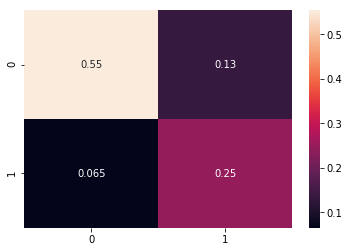

In [40]:
sns.heatmap(confusion_matrix(pred,y_test)/pred.size,annot=True)

In [41]:
print(classification_report(pred,y_test))

             precision    recall  f1-score   support

          0       0.90      0.81      0.85       159
          1       0.65      0.79      0.71        72

avg / total       0.82      0.80      0.81       231



Per analizzare tutti i modelli contemporaneamente

In [35]:
for clf, label in zip([gb,lr,rfc,eclf],["GaussianNB","Logistic Regression","Random Forest","Ensamble methods"]):
    score= cross_val_score(clf,x_train,y_train,cv=5,scoring="accuracy")
    print("Accuracy [{2}]: {0}(+/-){1} %".format(
        round(score.mean(),3),
        round(score.std(),3),
        label))

Accuracy [GaussianNB]: 0.76(+/-)0.038 %
Accuracy [Logistic Regression]: 0.743(+/-)0.03 %
Accuracy [Random Forest]: 0.745(+/-)0.034 %
Accuracy [Ensamble methods]: 0.752(+/-)0.042 %


la funzione `zip` crea un Iterator che permette l'utilizzo di for, passandogli gli elementi come array.

la funzione `cross_val_score` calcola il punteggio score tramite Cross-Validation